In [1]:
import morphs

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
folder = morphs.paths.FIGURES_DIR / "morphs"
single_folder = folder / "singles"

In [3]:
spects = morphs.load.morph_spectrograms()

In [4]:
for aspect in [0.3, 0.5]:
    for xlabel in [True, False]:
        for ylabel in [True, False]:
            for motif in "abcdefgh":
                if motif in spects:
                    g = next(iter(spects[motif]))
                    f = morphs.plot.spectrogram.single(
                        motif + g,
                        1,
                        spects,
                        aspect=aspect,
                        xlabel=xlabel,
                        ylabel=ylabel,
                    )
                else:
                    l = next(iter(spects))
                    f = morphs.plot.spectrogram.single(
                        l + motif,
                        128,
                        spects,
                        aspect=aspect,
                        xlabel=xlabel,
                        ylabel=ylabel,
                    )
                filename = motif
                if aspect == 0.3:
                    filename += "_short"
                if xlabel or ylabel:
                    filename += "_"
                    if xlabel:
                        filename += "x"
                    if ylabel:
                        filename += "y"
                morphs.plot.savefig(f, filename, folder=single_folder)
                plt.close(f)

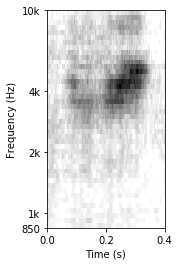

In [5]:
dim = "ad"
pos = 64
f = morphs.plot.spectrogram.single(dim, pos, spects, aspect=0.3)

morphs.plot.savefig(f, "%s%03d_short_xy" % (dim, pos), folder=single_folder)

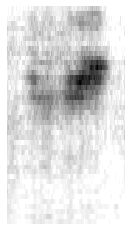

In [6]:
dim = "ad"
pos = 64
f = morphs.plot.spectrogram.single(
    dim, pos, spects, aspect=0.3, xlabel=False, ylabel=False
)

morphs.plot.savefig(f, "%s%03d_short" % (dim, pos), folder=single_folder)

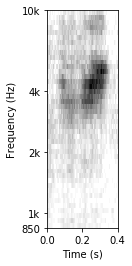

In [7]:
dim = "ad"
pos = 64
f = morphs.plot.spectrogram.single(dim, pos, spects, aspect=0.5)

morphs.plot.savefig(f, "%s%03d_xy" % (dim, pos), folder=single_folder)

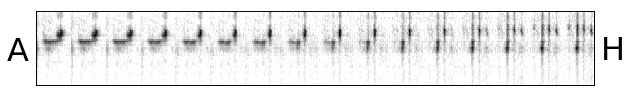

In [8]:
f = morphs.plot.spectrogram.morph(["ah"], spects)
morphs.plot.savefig(f, "AH-morph", folder=folder)

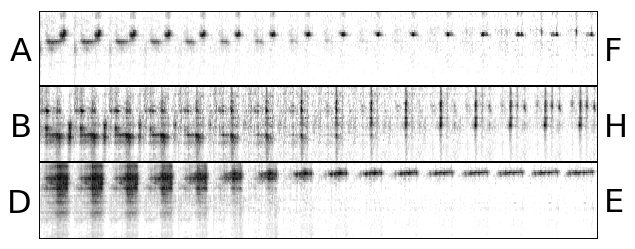

In [9]:
f = morphs.plot.spectrogram.morph(["af", "bh", "de"], spects)
morphs.plot.savefig(f, "3-morphs", folder=folder)

In [10]:
all_dims = np.sort([l + g for l in spects for g in spects[l]])

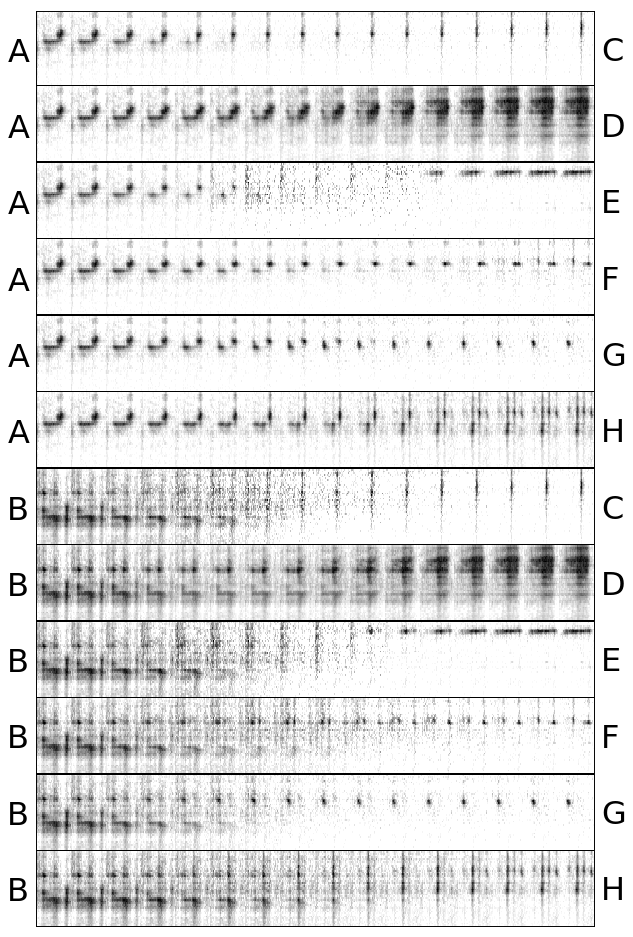

In [11]:
f = morphs.plot.spectrogram.morph(all_dims[:12], spects)
morphs.plot.savefig(f, "all-morphs-1", folder=folder)

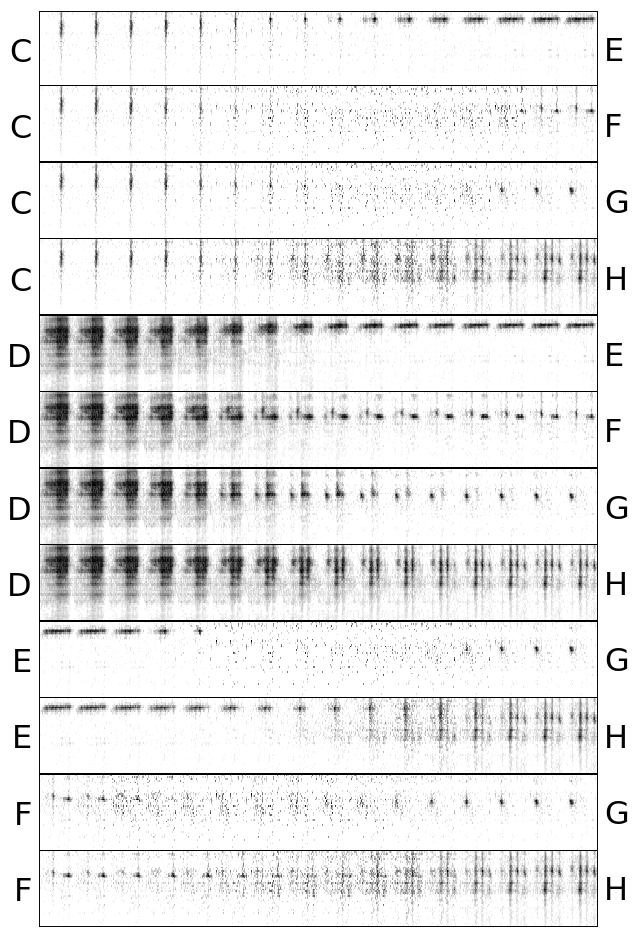

In [12]:
f = morphs.plot.spectrogram.morph(all_dims[12:], spects)
morphs.plot.savefig(f, "all-morphs-2", folder=folder)